In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [4]:
df.shape

(14640, 15)

In [5]:
## Extract Airline Sentiment and text...

df1 = df.loc[:,['airline_sentiment','text']]
df1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [6]:
##NLP Libraries

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
df1.text[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [9]:
## Removal of StopWords
df2 = '''@VirginAmerica plus you've added commercials to the experience... tacky.'''
words = df2.split()
newtext = " ".join([word for word in words if word not in stop_words])

In [10]:
df1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [28]:
## For Whole Data
def remove_stop(text):
  text = text.lower()
  words = text.split()
  return(" ".join([word for word in words if word not in stop_words]))

df1['clean_text'] = df1.text.apply(remove_stop)

In [29]:
df1.head()

,airline_sentiment,text,Clean_text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica @dhepburn said.,@virginamerica @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus added commercials experien...,@virginamerica plus added commercials experien...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica today... must mean need take an...,@virginamerica today... must mean need take an...
3,negative,@VirginAmerica it's really aggressive to blast...,@virginamerica really aggressive blast obnoxio...,@virginamerica really aggressive blast obnoxio...
4,negative,@VirginAmerica and it's a really big bad thing...,@virginamerica really big bad thing,@virginamerica really big bad thing


In [30]:
# Removal of Noise in data
print(newtext)
re.findall("[^A-Za-z\s]",newtext)


@VirginAmerica plus added commercials experience... tacky.


['@', '.', '.', '.', '.']

In [51]:
def clean_text(text):
  #text = re.findall("@\w+|[^A-Za-z\s]",text)
  text = re.sub("@\w+|[^A-Za-z\s]"," ",text)
  # text = re.sub("\s+"," ",text)
  return(text.strip())
print(clean_text(newtext).strip())

plus added commercials experience    tacky


In [52]:
def preview(text):
  text = re.findall("@\w+|[^A-Za-z0-9\s]",text)
  return(text)

df1['noise'] = df1.clean_text.apply(preview)


In [53]:
# df1.head()

In [54]:
# df.loc[14636,:]

In [55]:
noise = set(char for sublist in df1.noise for char in sublist)
sorted_noise = sorted(list(noise))
print(sorted_noise)
# for sublist in df1.noise:
#   print(sublist)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '=', '?', '@', '@0xjared', '@10am', '@12am', '@2littlebirds', '@3', '@41cgqueen', '@44stocker', '@4geiger', '@5', '@930', '@9news', '@__rwg__', '@_austrian', '@_defcon_', '@_emmaclifford', '@_justdippin_', '@_lucy_may', '@_robprice', '@a_life_story_', '@aa', '@aacustomerservice', '@aarp', '@abc', '@abc11_wtvd', '@abc7newsbayarea', '@abcnetwork', '@abigailedge', '@acnewsguy', '@actingoutmgmnt', '@active_aly', '@adam_karren', '@addair', '@admiralsclub', '@aegeanairlines', '@aerocivilcol', '@aggiemensgolf', '@airbus', '@airbusintheus', '@aircanada', '@airfarewatchdog', '@airlineadviser', '@airlinegeeks', '@airlineguys', '@airlinequality', '@airlines', '@airnzusa', '@airport', '@airport_fra', '@airsouthwest', '@airtahitinui', '@alan_bledsoe', '@alaskaair', '@albertbreer', '@alfamilyoffour', '@allegiantair', '@allegianttravel', '@alstdi', '@alynewton', '@amagrino', '@american', '@americanair', '@americanai

In [56]:
# CLean the text column in the dataframe

df1['Cleansed'] = df1.clean_text.apply(clean_text)

In [57]:
# df1.head()


## Text Visualization


In [58]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

all_tokens = [tokens for word in df1.Cleansed for tokens in word_tokenize(word)]

In [65]:
# Freq Distribution
pd.DataFrame(FreqDist(all_tokens).items(),columns=["Tokens","Freq"]).\
sort_values(by="Freq",ascending=False).head(25).Tokens

,Tokens
29,flight
43,t
94,i
204,get
55,co
103,http
105,thanks
500,s
482,cancelled
254,service


In [81]:
## List of Words
stops = ["t","s","http","https","co","i","m","u","ve","ll","w","aa"]

def custom_stop(text):
  text = text.lower()
  words = text.split()
  return(" ".join([word for word in words if word not in stops]))

df1['Cleansed'] = df1.Cleansed.apply(custom_stop)

In [82]:
df1.head()

,airline_sentiment,text,Clean_text,clean_text,noise,Cleansed
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica @dhepburn said.,@virginamerica @dhepburn said.,"[@virginamerica, @dhepburn, .]",said
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus added commercials experien...,@virginamerica plus added commercials experien...,"[@virginamerica, ., ., ., .]",plus added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica today... must mean need take an...,@virginamerica today... must mean need take an...,"[@virginamerica, ., ., ., !]",today must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,@virginamerica really aggressive blast obnoxio...,@virginamerica really aggressive blast obnoxio...,"[@virginamerica, "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,@virginamerica really big bad thing,@virginamerica really big bad thing,[@virginamerica],really big bad thing


In [83]:
all_tokens = [tokens for word in df1.Cleansed for tokens in word_tokenize(word)]
freq_df = pd.DataFrame(FreqDist(all_tokens).items(),columns=["Tokens","Freq"]).\
sort_values(by="Freq",ascending=False)
freq_df.head()

,Tokens,Freq
29,flight,3958
195,get,1342
98,thanks,1083
473,cancelled,1065
245,service,967


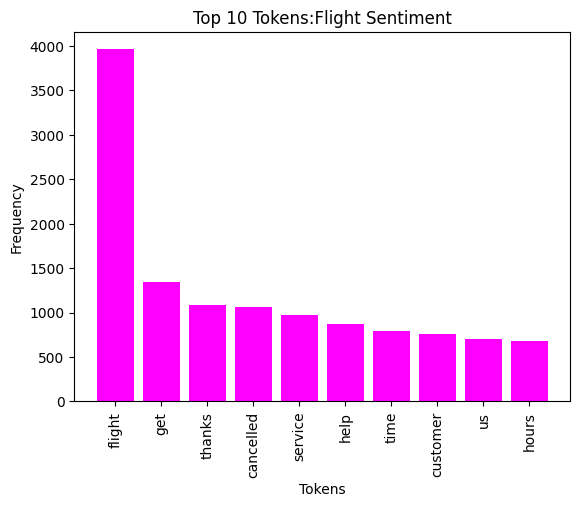

In [84]:
# Visualize the df

plt.bar(freq_df.Tokens[:10],freq_df.Freq[:10],color='magenta')
plt.title("Top 10 Tokens:Flight Sentiment")
plt.xlabel("Tokens")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

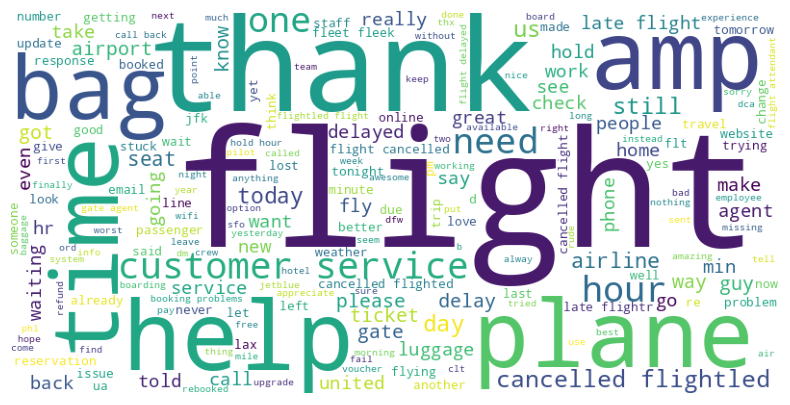

In [85]:
# Word Cloud of the Flight Data
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=400,background_color='white').\
                      generate(" ".join(all_tokens))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# ['ua','w','dca','clt','re','ll','d','u','aa','jfk','b','ve']

In [87]:
df1.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [92]:
mapped = {'neutral':0, 'positive':1, 'negative':-1}
df1['Target'] = df1.airline_sentiment.map(mapped)
df1.head()

,airline_sentiment,text,Clean_text,clean_text,noise,Cleansed,Target
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica @dhepburn said.,@virginamerica @dhepburn said.,"[@virginamerica, @dhepburn, .]",said,0
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus added commercials experien...,@virginamerica plus added commercials experien...,"[@virginamerica, ., ., ., .]",plus added commercials experience tacky,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica today... must mean need take an...,@virginamerica today... must mean need take an...,"[@virginamerica, ., ., ., !]",today must mean need take another trip,0
3,negative,@VirginAmerica it's really aggressive to blast...,@virginamerica really aggressive blast obnoxio...,@virginamerica really aggressive blast obnoxio...,"[@virginamerica, "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...,-1
4,negative,@VirginAmerica and it's a really big bad thing...,@virginamerica really big bad thing,@virginamerica really big bad thing,[@virginamerica],really big bad thing,-1


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = df1['Cleansed']
y = df1['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.85      0.89      0.87      1889
           0       0.60      0.57      0.58       580
           1       0.77      0.68      0.73       459

    accuracy                           0.79      2928
   macro avg       0.74      0.71      0.73      2928
weighted avg       0.79      0.79      0.79      2928



In [91]:
# prompt: give me Tf-IDF code for the same

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Logistic Regression model
model_tfidf = LogisticRegression()

# Train the model
model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred_tfidf))


              precision    recall  f1-score   support

          -1       0.81      0.94      0.87      1889
           0       0.68      0.44      0.53       580
           1       0.83      0.62      0.71       459

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.79      0.79      0.78      2928

